Laboratory 2: Computer Vision

Part 1: MNIST Digit Classification

In the first portion of this lab, we will build and train a Convolution Neural Network (CNN) for classification of handwritten digits from the famous MNIST dataset. The MNIST dataset consist of 60,000 training images and 10,000 test images. Our classes are the digits 0-9.

First, let's download the course repository, install dependencies, and import the relevant packages we'll need for this lab.

In [1]:
# Import PyTorch and other relevant libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchsummary import summary

# Other packages
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

In [2]:
import comet_ml
# TODO: ENTER YOUR API KEY HERE !!
COMET_API_KEY = "IfAOqB1pulTvZR0qAUE9qFPjW"

# Check that we are using a GPU
assert torch.cuda.is_available(), "Please enable GPU"
assert COMET_API_KEY != "", "Please insert your Comet API Key"

# Set GPU for computation
device = torch.device("cuda" if torch.cuda.is_available () else "cpu")

In [3]:
# start a first comet experiment for the first part of the lab
comet_ml.init(project_name="Deep_Learning_lab2_part2_NN")
comet_model_1 = comet_ml.Experiment()

COMET WARNING: comet_ml.init() is deprecated and will be removed soon. Please use comet_ml.login()


Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)


COMET INFO: Valid Comet API Key saved in C:\Users\Anthonny\.comet.config (set COMET_CONFIG to change where it is saved).
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/anthonny20/deep-learning-lab2-part2-nn/ec50f6adfc924c15b5230da635c1af2f



MNIST Dataset

Let's download and load the dataset and display a few random samples from it:

In [4]:
# Download and transform the MNIST dataset
transform = transforms.Compose([
        # Convert images to PyTorch tensors which also scales data from [0, 255] to [0,1]
        transforms.ToTensor()
])

# Download training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:24<00:00, 407kB/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 291kB/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:05<00:00, 324kB/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.54MB/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



The MNIST dataset object in PyTorch is not a simple tensor or array. It's an iterable dataset that loads samples (image-label pairs) one at a time or in batches. In a later section of this lab, we will define a handy DataLoader to process the data in batches.

In [ ]:
image, label = train_dataset[0]
print(image.size()) # For a tensor: torch.Size([1, 28, 28])
print(label) # For a label: integer (e.g., S)

torch.Size([1, 28, 28])
5


Our training set is made up of 28x28 grayscale images of handwritten digits.

Let's visualize what some of these images and their corresponding training labels look like.

In [14]:
print(random_inds)

[4066 5902 3267 2753 3121 1817 5855 3560 5691 5906 2604 4336   82 2168
 4269  977 2670  563 4515 5530 1172 3196 1005 5403 5821 1962 3139 5510
 5565 3046 2554 4878 3479 1754 5869 1475]


{'web': 'https://www.comet.com/api/image/download?imageId=44c6c2d8da90492e8b86a7f95b532bc7&experimentKey=ec50f6adfc924c15b5230da635c1af2f',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=44c6c2d8da90492e8b86a7f95b532bc7&experimentKey=ec50f6adfc924c15b5230da635c1af2f',
 'imageId': '44c6c2d8da90492e8b86a7f95b532bc7'}

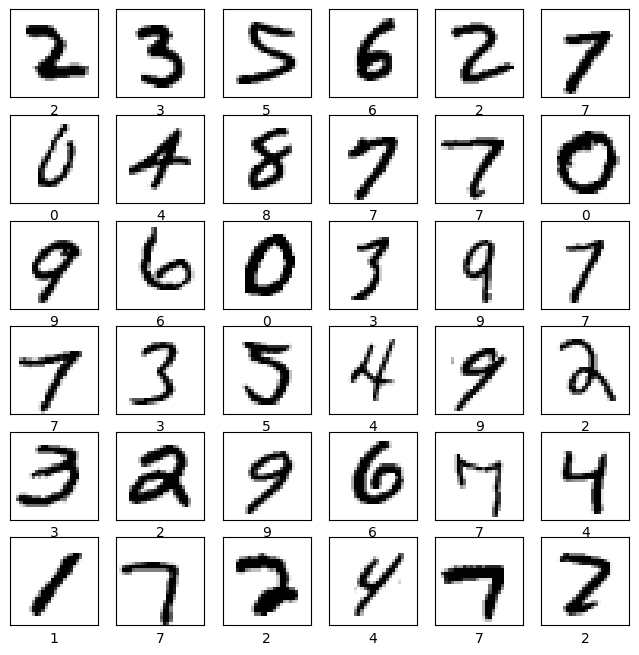

In [19]:
plt.figure(figsize=(8, 8))
random_inds = np.random.choice(6000, 36)
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    image, label = train_dataset[image_ind]
    plt.imshow(image.squeeze(), cmap=plt.cm.binary)
    plt.xlabel(label)
comet_model_1.log_figure(figure=plt)

1.2 Neural Network for Handwritten Digit Classification

We'll first build a simple neural network consisting of two fully connected layers and apply this to the digit classification task. Our network will ultimately output a probability distribution over the 10 digit classes (0-9).

Fully connected Neural Network architecture

To define the architecture of this first Fully Connected Neural Network, we'll once again use the torch.nn modules, defining the model using nn.Sequential. Note how we first use a nn.Flatten layer, which flattens the input so that it can be fed into the model.

In this next block, you'll define the fully connected layer of this simple network.

In [22]:
def build_fc_model():
    fc_model = nn.Sequential(
        # First define a Flatten layer
        nn.Flatten(),
        # '''TODO''': Define the activation funtion for the first fully connected (Dense/Linear) layer.'''
        nn.Linear(28*28, 128),
        nn.ReLU(),      
        #'''TODO: Define the second Linear layer to output the classification probabilities'''
        nn.Linear(128, 10),
    )
    return fc_model

fc_model_sequential = build_fc_model()

As we progress through this next portion, you may find that you'll want to make changes to the architecture defined above. Note that in order to update the model later on, you'll need to re-run the above cell to re-initialize the model.

Let's take a step back and think about the network we've just created. The first layer in this network nn.Flatten, transforms the format of the images from a 2d-array(28 x 28 pixels), to a 1d-array of 28*28 = 784 pixels. You can think of this layer as unstacking rows of pixels in the image and lining them up. There are no learned parameters in this layer; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two nn.Linear layers. These are fully-connected neural layers. The first nn.Linear layer has 128 nodes (or neurons). The second (and last) layer (which you've defined!) should return an array of probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the handwritten digit classes.

That defines our fully connected model!

Embracing subclassing in PyTorch

Recall that in Lab 1, we explored creating more flexible models by subclassing nn.Module. This technique od defining models is more commonly used in PyTorch. We will practice using this approach of subclassing to define our models for the rest of the lab.

In [23]:
# Define the fully connected model
class FullyConnectedModel(nn.Module):
    def __init__(self):
        super(FullyConnectedModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        
        #'''TODO: Define the activation funtion for the first fully connected layer'''
        self.relu = nn.ReLU()
        
        #'''TODO: Define the second Linear layer to output the classification probabilities'''
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        
        #'''TODO: Implement the rest of forward pass of the model using the layers you have defined above'''
        '''TODO'''
        X = self.relu(x)
        x = self.fc2(x)
        
        return x

fc_model = FullyConnectedModel().to(device) # Send the model to the GPU

COMET ERROR: Due to connectivity issues, there's an error in processing the heartbeat. The experiment's status updates might be inaccurate until the connection issues are resolved.


Model Metrics and Training Parameters